<a href="https://colab.research.google.com/github/arumajirou/-daily-test/blob/main/Darts_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dartsとは

---
時系列の操作と予測を簡単に行うためのPythonライブラリです。

---


*   ARIMAのような古典的なものからディープニューラルネットワークまで様々なモデルが含まれています。 

*   これらのモデルはscikit-learnと同様にfit()とpredict()関数を使って同様に使用することができます。
*   また、このライブラリでは、モデルのバックテスト、複数のモデルの予測の結合、外部データの考慮が簡単にできます。 


*    Dartsは一変量と多変量の時系列とモデルの両方をサポートしています。


*   MLベースのモデルは、複数の時系列を含む大規模データセットで学習でき、モデルの中には確率的 予測のサポートを豊富に提供するものがあります。

<br>


*   クイックスタート
https://unit8co.github.io/darts/quickstart/00-quickstart.html

*   ユーザーガイド
https://unit8co.github.io/darts/userguide.html

*   APIリファレンス
https://unit8co.github.io/darts/generated_api/darts.html

*   事例紹介
https://unit8co.github.io/darts/examples.html




# Dartsのインストール

In [1]:
!pip install darts

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [42]:
!pip install japanize_matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.1 MB 7.3 MB/s 
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120275 sha256=4fc2b2adc99fbd6539df522f24b98aebd25580255992c4b668c7ff769bb5d285
  Stored in directory: /root/.cache/pip/wheels/4f/ca/96/4cc5e192421cceb077fbf4ffec533382edd416fd3fa0af0bbd
Successfully built japanize-matplotlib


In [43]:
#自動的にpythonファイルをリロードするよう、以下のコマンドを設定しています。
%load_ext autoreload
#タイプされたPythonコードを実行する前に、
#毎回すべてのモジュール（%aimportで除外されたものを除く）を再ロードします。
%autoreload 2

%matplotlib inline
import japanize_matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#TimeSeriesはDartsの主要なデータクラスです。TimeSeriesは適切な時間インデックスを持つ一変量または多変量の時系列を表します。
from darts import TimeSeries
from darts.datasets import AirPassengersDataset

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# 時系列の構築と操作¶。
TimeSeriesはDartsの主要なデータクラスです。TimeSeriesは適切な時間インデックスを持つ一変量または多変量の時系列を表します。時間インデックスはpandas.DatetimeIndex（日付時間を含む）か、pandas.RangeIndex（整数を含む、特定のタイムスタンプのない連続したデータを表すのに便利）タイプです。場合によっては、TimeSeriesは信頼区間を得るために、確率的な系列を表現することもできます。Dartsの全てのモデルはTimeSeriesを消費し、TimeSeriesを生成する。

# データを読み込んで時系列を構築する¶。
時系列はいくつかのファクトリーメソッドを使って簡単に構築することができます。

- PandasDataFrame全体から、TimeSeries.from_dataframe()を使用します（docs）。

- TimeSeries.from_times_and_values()(docs) を使って、時間インデックスとそれに対応する値の配列から取得します。

- TimeSeries.from_values()(ドキュメント)を使用して、NumPyの配列から値を取得します。

- Pandasのシリーズから、TimeSeries.from_series()を使用する(docs)。

- TimeSeries.from_xarray()を使用して、xarray.DataArrayから取得します(docs)。

- TimeSeries.from_csv()を使ってCSVファイルから取得します（docs）。

以下では、Dartsで利用可能なデータセットの1つから航空旅客の系列を直接ロードして時系列を取得します。

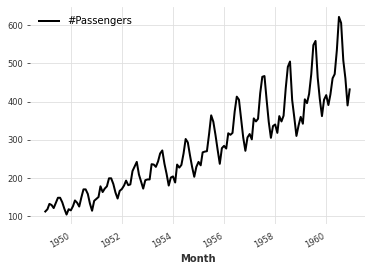

In [3]:
series = AirPassengersDataset().load()
series.plot()

# いくつかの時系列の操作¶。
時系列は様々な種類の操作をサポートしています。ここではいくつかの例をご紹介します。

**分割**

また、シリーズの端数、pandasTimestamp、整数のインデックス値で分割することも可能です。

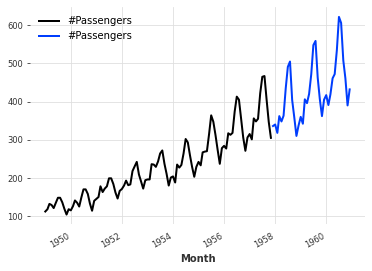

In [4]:
series1, series2 = series.split_before(0.75)
series1.plot()
series2.plot()

## スライシングを行います。

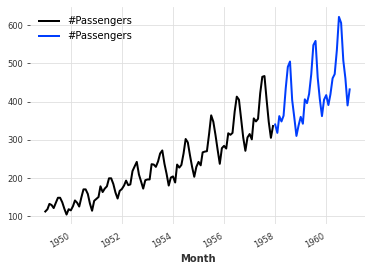

In [5]:
series1, series2 = series[:-36], series[-36:]
series1.plot()
series2.plot()

## 算術演算

In [6]:
series.time_index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq='MS')

In [7]:
 np.random.randn(len(series))

array([-0.42275709, -0.09601867,  0.63767328, -0.2026772 , -0.65773075,
       -1.10361357,  0.39229091, -2.25306901,  0.26166073, -0.23238533,
        0.24295106, -0.82183347,  0.06077531,  0.38493164, -0.27371245,
        0.29770668, -0.2393684 ,  0.24147777,  0.99503541,  0.8866471 ,
       -0.74984962,  0.46910095,  1.66315931,  0.07890232, -0.02666319,
        1.34239774,  1.16917148,  0.65994608,  0.07467622, -0.30624321,
        0.96539854, -1.40459879, -0.4421016 , -2.13269148,  0.03987397,
       -0.4822939 , -1.02291347, -1.21733191, -0.96097327, -0.88875078,
        1.35650789, -0.39968855,  0.43301569, -0.98710708, -0.79469868,
       -0.41247845,  0.67844128, -0.11763321,  1.26436042, -1.65959702,
       -0.73418488,  0.43167053, -0.3147885 ,  0.75549347,  1.71757369,
       -0.19031738,  1.11487195,  1.7757676 , -0.2945652 ,  0.85332745,
       -0.76520963, -1.65566228, -0.11818962,  0.34622076,  0.27352138,
        1.63937779, -0.92919505, -0.69390161,  0.29181275, -0.11

In [8]:
series

<TimeSeries (DataArray) (Month: 144, component: 1, sample: 1)>
array([[[112.]],

       [[118.]],

       [[132.]],

       [[129.]],

       [[121.]],

       [[135.]],

       [[148.]],

       [[148.]],

       [[136.]],

       [[119.]],

...

       [[419.]],

       [[461.]],

       [[472.]],

       [[535.]],

       [[622.]],

       [[606.]],

       [[508.]],

       [[461.]],

       [[390.]],

       [[432.]]])
Coordinates:
  * Month      (Month) datetime64[ns] 1949-01-01 1949-02-01 ... 1960-12-01
  * component  (component) object '#Passengers'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None

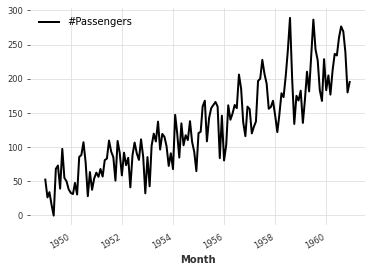

In [9]:
series_noise = TimeSeries.from_times_and_values(
    series.time_index, np.random.randn(len(series))
)
(series / 2 + 20 * series_noise - 10).plot()

# かさなり

新しい次元を連結して、新しい単一の多変量系列を生成する。

In [10]:
series_noise

<TimeSeries (DataArray) (Month: 144, component: 1, sample: 1)>
array([[[ 0.30334163]],

       [[-1.15055802]],

       [[-1.11705939]],

       [[-1.98420044]],

       [[-2.55686312]],

       [[ 0.51715003]],

       [[ 0.43446186]],

       [[-1.25762613]],

       [[ 1.95265139]],

       [[ 0.25581363]],

...

       [[-1.14282981]],

       [[-0.4198302 ]],

       [[ 0.5171842 ]],

       [[-1.17283037]],

       [[-2.05897775]],

       [[-0.82086887]],

       [[ 1.25800373]],

       [[ 0.90858412]],

       [[-0.25731586]],

       [[-0.54285198]]])
Coordinates:
  * Month      (Month) datetime64[ns] 1949-01-01 1949-02-01 ... 1960-12-01
  * component  (component) <U1 '0'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None

In [11]:
series

<TimeSeries (DataArray) (Month: 144, component: 1, sample: 1)>
array([[[112.]],

       [[118.]],

       [[132.]],

       [[129.]],

       [[121.]],

       [[135.]],

       [[148.]],

       [[148.]],

       [[136.]],

       [[119.]],

...

       [[419.]],

       [[461.]],

       [[472.]],

       [[535.]],

       [[622.]],

       [[606.]],

       [[508.]],

       [[461.]],

       [[390.]],

       [[432.]]])
Coordinates:
  * Month      (Month) datetime64[ns] 1949-01-01 1949-02-01 ... 1960-12-01
  * component  (component) object '#Passengers'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None

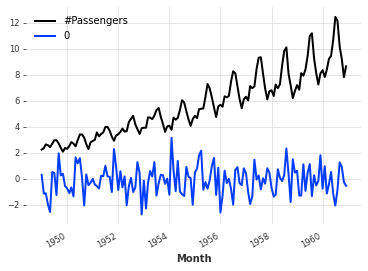

In [12]:
(series / 50).stack(series_noise).plot()

## マッピングを行います。

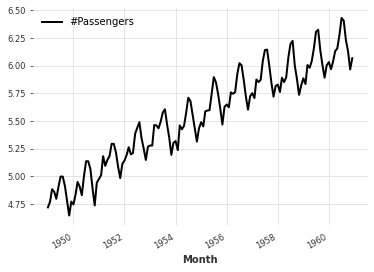

In [13]:
series.map(np.log).plot()

## タイムスタンプと値の両方にマッピングします。

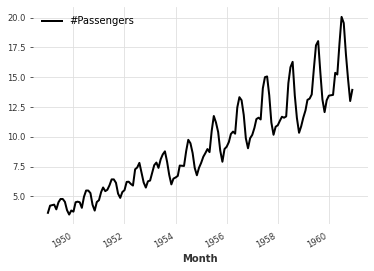

In [14]:
series.map(lambda ts, x: x / ts.days_in_month).plot()

## 追加次元としてdatetime属性を追加する(多変量系列が得られる)。

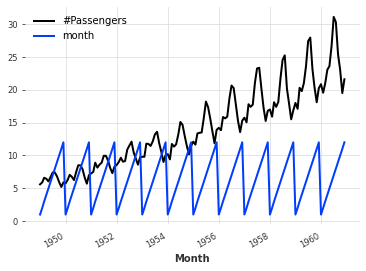

In [15]:
(series / 20).add_datetime_attribute("month").plot()

## 何らかのバイナリーホリデーコンポーネントを追加する。

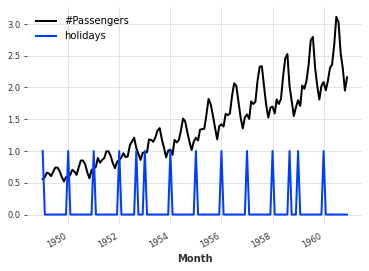

In [16]:
(series / 200).add_holidays("US").plot()

## ディファレンシングを行います。


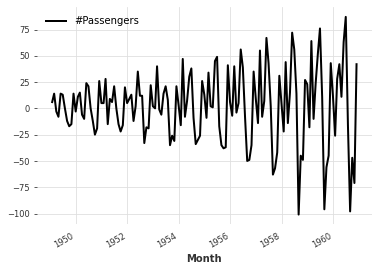

In [17]:
series.diff().plot()

# 欠損値を埋める (``utils`` 関数を使用).

欠測値はnp.nanで表現しています。

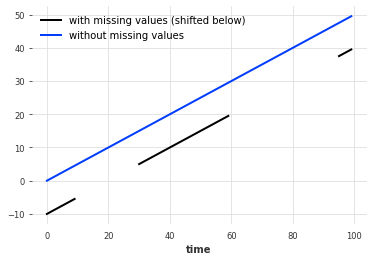

In [18]:
from darts.utils.missing_values import fill_missing_values

values = np.arange(50, step=0.5)
values[10:30] = np.nan
values[60:95] = np.nan
series_ = TimeSeries.from_values(values)

(series_ - 10).plot(label="with missing values (shifted below)")
fill_missing_values(series_).plot(label="without missing values")

# トレーニングシリーズとバリデーションシリーズを作成する¶。
以下では、TimeSeriesをトレーニング用と検証用に分割します。注：一般的には、テスト用シリーズを脇に置いておき、プロセスの最後まで触らないようにするのも良い方法です。ここでは、単純化するために、学習用と検証用のシリーズを作成します。

学習用系列は1958年1月までの値（除外）を含むTimeSeries、検証用系列はそれ以外を含むTimeSeriesとする。

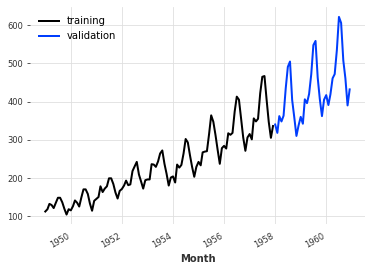

In [19]:
#学習用系列は1958年1月までの値
train, val = series.split_before(pd.Timestamp("19580101"))
train.plot(label="training")
val.plot(label="validation")

# 予測モデルの学習と予測¶。
# おもちゃの模型で遊ぶ¶。
Dartsには「ナイーブな」ベースラインモデルのコレクションがあり、期待できる最低限の精度のアイデアを得るのに非常に便利です。例えば、NaiveSeasonal(K)モデルは常にK時間ステップ前に発生した値を「繰り返し」ます。

最も素朴な形であるK=1では、このモデルは常に学習系列の最後の値を繰り返すだけである。

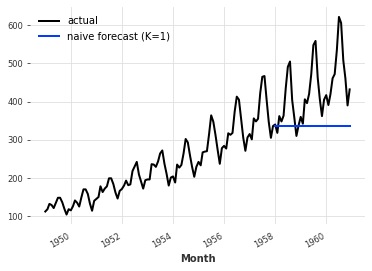

In [20]:
from darts.models import NaiveSeasonal

naive_model = NaiveSeasonal(K=1)
naive_model.fit(train)
naive_forecast = naive_model.predict(36)

series.plot(label="actual")
naive_forecast.plot(label="naive forecast (K=1)")

時系列にモデルを当てはめ、予測を行うのはとても簡単です。すべてのモデルにはfit()とpredict()関数があります。これはScikit-learnに似ていますが、時系列に特化している点が異なります。fit()関数はモデルを当てはめるための学習用時系列を引数に取り、predict()関数は予測を行うための（学習用時系列の終了後の）時間ステップ数を引数に取ります。

## 季節性を検査する¶。
上記のモデルは、おそらく少し素朴すぎるのではないでしょうか。データの季節性を利用することで、すでに改善することができます。このデータが1年ごとの季節性を持っていることは明らかで、自己相関関数（ACF）を見て、ラグm=12を強調することで確認することができます。

# 自己相関関数（ACF）
Minitab Statistical Software についての 詳細
自己相関関数は、k時間単位離れた時系列の観測値間の相関（ytとyt-k）を表す測度です。

# 解釈
自己相関関数と偏自己相関関数を併用して、ARIMAモデルを特定します。各遅れでのスパイクを調べ、それらのスパイクが有意かどうか判断します。有意なスパイクは有意限界を越えて広がっており、これは、その遅れの相関がゼロにならないことを示します。

以下のパターンに基づいて、ARIMAモデルでの自己回帰項とMA項を指定できます。

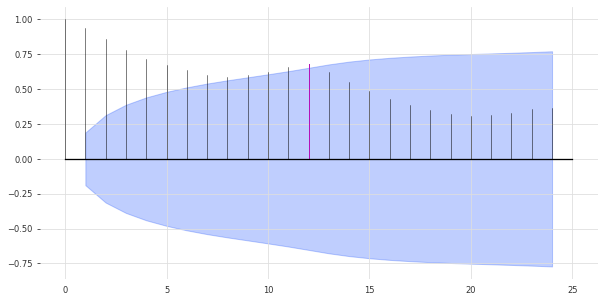

In [21]:
from darts.utils.statistics import plot_acf, check_seasonality

plot_acf(train, m=12, alpha=0.05)

ACFはx = 12でスパイクを示し、これは年間の季節性傾向を示唆している（赤でハイライト）。青い領域は、信頼水準が .また、各候補期間mについて季節性の統計的チェックを行うことができます。

In [22]:
for m in range(2, 25):
    print(m)
    is_seasonal, period = check_seasonality(train, m=m, alpha=0.05)
    if is_seasonal:
        print("季節性があります {}.".format(period))#上図ピンクの線

2
3
4
5
6
7
8
9
10
11
12
季節性があります 12.
13
14
15
16
17
18
19
20
21
22
23
24


## より素朴なモデル¶。
季節性を12としたNaiveSeasonalモデルを再度試してみましょう。

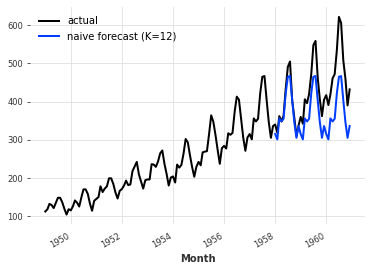

In [23]:
#季節性を12としたNaiveSeasonalモデル
seasonal_model = NaiveSeasonal(K=12)
seasonal_model.fit(train)
seasonal_forecast = seasonal_model.predict(36)

series.plot(label="actual")
seasonal_forecast.plot(label="naive forecast (K=12)")

これはより良い方法ですが、まだトレンドを見逃しています。幸いなことに、トレンドを捉えるもう一つのナイーブなベースラインモデルがあり、それはNaiveDriftと呼ばれています。このモデルは単純に線形予測を行い、その傾きはトレーニングセットの最初と最後の値によって決定されます。

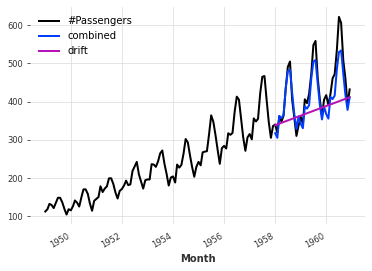

In [24]:
from darts.models import NaiveDrift

drift_model = NaiveDrift()
drift_model.fit(train)
drift_forecast = drift_model.predict(36)

combined_forecast = drift_forecast + seasonal_forecast - train.last_value()

series.plot()
combined_forecast.plot(label="combined")
drift_forecast.plot(label="drift")

そこで何が起こったのでしょうか？単純にナイーブドリフトモデルをフィットさせ、その予測を以前持っていた季節予測に追加します。また、その結果からトレーニングセットの最後の値を引き、結果として得られる複合予測が正しいオフセットで開始されるようにします。

# エラーメトリクスの計算¶。
これはもう、かなりまともな予報のようで、まだ未熟なモデルは使っていません。実際、どんなモデルでもこれを上回ることができるはずです。

では、**私たちが打ち勝たなければならない誤差は何でしょうか？ここではMean Absolute Percentage Error (MAPE)(平均絶対値誤差)を使います**（実際にはMAPEを使わない理由もよくありますが、ここでは非常に便利で規模に依存しないので使っています）。Dartsでは、これは単純な関数呼び出しです。

# **［評価関数］平均絶対パーセント誤差（MAPE：Mean Absolute Percentage Error）とは？**

　機械学習における**平均絶対パーセント誤差（MAPE：Mean Absolute Percentage Error）**とは、各データに対して「予測値と正解値との差を、正解値で割った値（＝**パーセント誤差**）」の**絶対値**を計算し、その総和をデータ数で割った値（＝**平均値**）を出力する関数である。（図1）。100％の確率値にするため、一般的には最後に100を掛ける（もちろん掛けなくてもよい）。なお誤差は、「予測値－正解値」ではなく「正解値－予測値」でもよい。

https://image.itmedia.co.jp/ait/articles/2106/09/di-01.gif

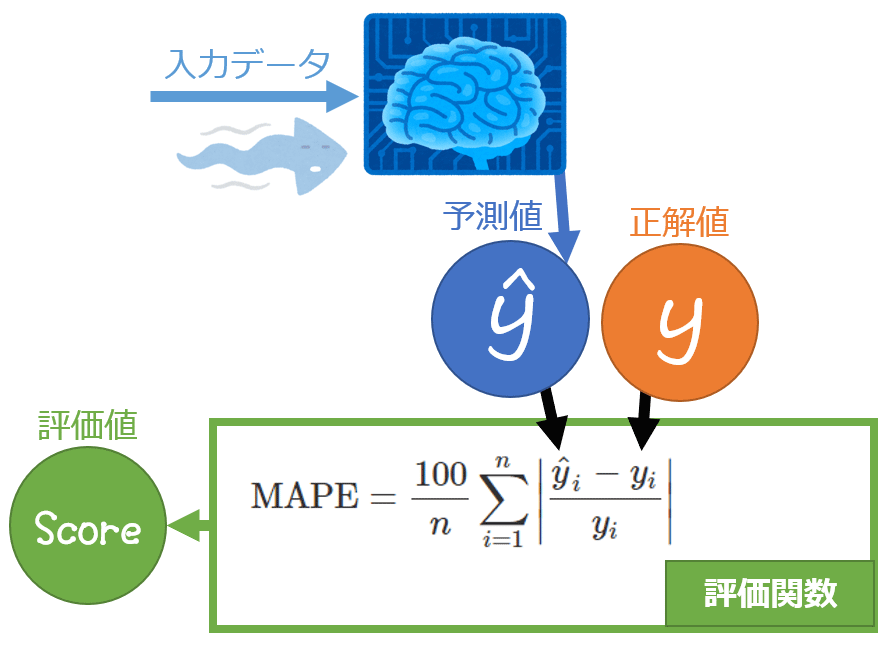

In [25]:
from darts.metrics import mape

print(
    "結合された単純なドリフト + 季節の絶対パーセント誤差の平均: {:.2f}%.".format(
        mape(series, combined_forecast)
    )
)

結合された単純なドリフト + 季節の絶対パーセント誤差の平均: 5.66%.


darts.metricsには時系列を比較するためのもっとたくさんのメトリクスが含まれています。このメトリクスは、2つの系列が整列していない場合に、系列の共通のスライスだけを比較し、多数の系列のペアで計算を 並列化します - しかし、先走るのはやめましょう。

# 複数のモデルを素早く試す¶。
Dartsは複数のモデルの学習と検証を統一的な方法で簡単に行えるように作られています。さらにいくつかのモデルを学習させ、検証セットでそれぞれのMAPEを計算してみましょう。

In [26]:
from darts.models import ExponentialSmoothing, TBATS, AutoARIMA, Theta


def eval_model(model):
    model.fit(train)
    forecast = model.predict(len(val))
    print("model {} obtains MAPE: {:.2f}%".format(model, mape(val, forecast)))


eval_model(ExponentialSmoothing())
eval_model(TBATS())
eval_model(AutoARIMA())
eval_model(Theta())

model ExponentialSmoothing(trend=ModelMode.ADDITIVE, damped=False, seasonal=SeasonalityMode.ADDITIVE, seasonal_periods=12 obtains MAPE: 5.11%
model (T)BATS obtains MAPE: 5.87%
model Auto-ARIMA obtains MAPE: 11.65%
model Theta(2) obtains MAPE: 8.15%


ここでは、これらのモデルをデフォルトのパラメータで構築したに過ぎません。私たちの問題に合わせて微調整すれば、もっとうまくいくはずです。シータ法でやってみましょう。

# **シータ法によるハイパーパラメータの探索¶。**
モデルThetaはAssimakopoulosとNikolopoulosのThetaメソッドの実装を含んでいます。この方法は、特にM3-competitionで成功を収めています。

Theta パラメータの値は、アプリケーションでは0に設定されることが多いのですが、我々の実装では、パラメータチューニングの目的で可変値をサポートしています。それでは、Thetaの良い値を探してみましょう。

In [27]:
# 50種類の値を試して、最適なθパラメータを探す
thetas = 2 - np.linspace(-10, 10, 50)

best_mape = float("inf")
best_theta = 0

for theta in thetas:
    model = Theta(theta)
    model.fit(train)
    pred_theta = model.predict(len(val))
    res = mape(val, pred_theta)

    if res < best_mape:
        best_mape = res
        best_theta = theta

In [28]:
best_theta_model = Theta(best_theta)
best_theta_model.fit(train)
pred_best_theta = best_theta_model.predict(len(val))

print(
    "The MAPE is: {:.2f}, with theta = {}.".format(
        mape(val, pred_best_theta), best_theta
    )
)

The MAPE is: 4.40, with theta = -3.5102040816326543.


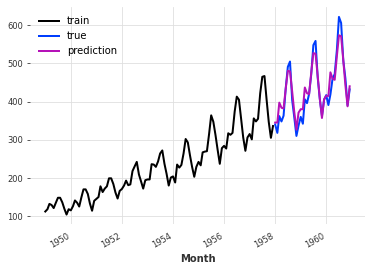

In [29]:
train.plot(label="train")
val.plot(label="true")
pred_best_theta.plot(label="prediction")

MAPEの観点からは、best_thetaを用いたモデルが今のところベストであることがわかります。

# バックテスト：過去の予測をシミュレートする¶。
この時点で、検証セットで良好なパフォーマンスを発揮するモデルを手に入れたことになります。しかし、もしこのモデルを歴史的に使用していたら、どのようなパフォーマンスが得られたかをどうやって知ることができるでしょうか？

バックテストは、与えられたモデルを用いて歴史的に得られたであろう予測をシミュレートします。予測時間のシミュレーションが進むたびにモデルが再トレーニングされるため、生成に時間がかかる場合があります。

このようなシミュレーションによる予測は、常に予測時間から予測時間を隔てる時間ステップの数である予測ホライズンに関して定義されます。以下の例では、3ヶ月先の予測をシミュレートしています（予測時間と比較して）。historical_forecasts()を呼び出した結果は、（デフォルトで）それらの3ヶ月先の予測を含むTimeSeriesです。

100%|██████████| 57/57 [00:01<00:00, 31.03it/s]


MAPE = 7.70%


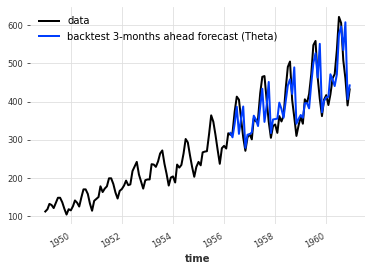

In [30]:
#
historical_fcast_theta = best_theta_model.historical_forecasts(
    series, start=0.6, forecast_horizon=3, verbose=True
)

series.plot(label="data")
historical_fcast_theta.plot(label="backtest 3-months ahead forecast (Theta)")
print("MAPE = {:.2f}%".format(mape(historical_fcast_theta, series)))

つまり、検証セットで最適化したモデルは、バックテストではもうあまり良い結果を出していないようです（オーバーフィッティングって聞こえたかな :D）。

誤差を詳しく見るには、backtest()メソッドを使用して、モデルによって得られたであろうすべての生の誤差（例えば、MAPE誤差）を得ることもできます。

100%|██████████| 57/57 [00:02<00:00, 28.49it/s]


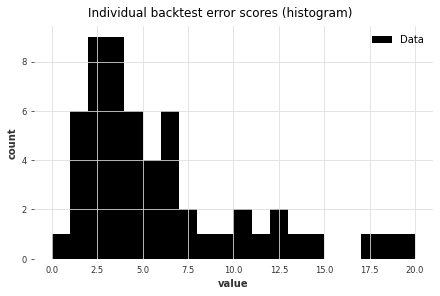

In [31]:
best_theta_model = Theta(best_theta)

raw_errors = best_theta_model.backtest(
    series, start=0.6, forecast_horizon=3, metric=mape, reduction=None, verbose=True
)

from darts.utils.statistics import plot_hist

plot_hist(
    raw_errors,
    bins=np.arange(0, max(raw_errors), 1),
    title="Individual backtest error scores (histogram)",
)

最後に、**backtest()**を使って、過去の予測の平均誤差をより簡単に見ることができます。

In [32]:
average_error = best_theta_model.backtest(
    series,
    start=0.6,
    forecast_horizon=3,
    metric=mape,
    reduction=np.mean,  # this is actually the default
    verbose=True,
)

print("過去のすべての平均誤差 (MAPE): %.2f" % average_error)

100%|██████████| 57/57 [00:03<00:00, 15.28it/s]


過去のすべての平均誤差 (MAPE): 6.36


また、**例えば引数reduction=np.medianを指定することで、MAPE の中央値を取得することも可能です**。

現在のシータモデルの適合値残差、つまり、過**去のすべての時点に対してモデルを適合させて得られた各時点の1段階予測と、実際の観測値との差**を見てみましょう。

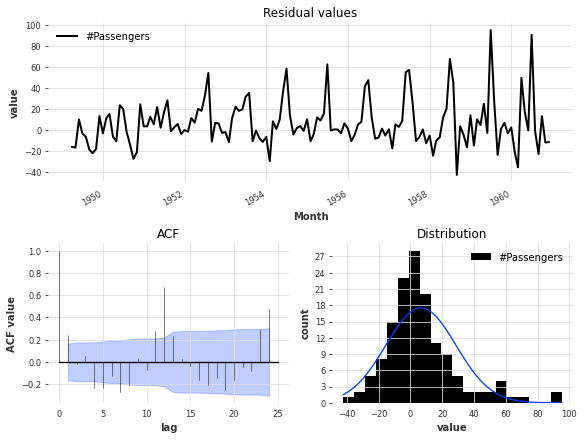

In [33]:
from darts.utils.statistics import plot_residuals_analysis

plot_residuals_analysis(best_theta_model.residuals(series))

**分布が0に集中していないことがわかりますが、これはシータモデルに偏りがあることを意味します**。

また、	<font color= "red">**12ラグで大きなACF値を確認することができます。</font>**

**これは、残差がモデルによって使用されなかった情報を含んでいることを示しています。**

単純な**ExponentialSmoothingモデル**でもっとうまくいくのでは？

# **指数平滑法予測 (Exponential Smoothing Forecast) (時空間パターン マイニング)**

---
**Holt-Winters 指数平滑法**を使用し、**各場所のキューブの時系列**を**季節性とトレンドの成分に分解**して**、時空間キューブの各場所における値を予測します。**


---
# **適用例**


---

指数平滑化は、長年にわたり最も研究されてきた時系列の予測方法の 1 つです。この方法は、時系列の値が漸進的なトレンドに従い、値が任意の時間ステップ数を通じて連続する周期パターンに従う季節ごとの動作を表示する際に最も有効です。

たとえば、このツールは次のような用途に使用できます:

- 都市部のヘルスプランナーはこのツールを使用して時間ごとの都心温度を予測し、酷暑中の熱に関連した疾患に備えることができます。
- 小売チェーンはこのツール使用して次の週の各曜日における各項目の需要を予測することができます。



100%|██████████| 57/57 [00:06<00:00,  9.01it/s]


MAPE = 4.45%


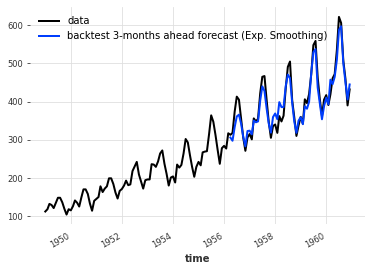

In [34]:
model_es = ExponentialSmoothing()
historical_fcast_es = model_es.historical_forecasts(
    series, start=0.6, forecast_horizon=3, verbose=True
)

series.plot(label="data")
historical_fcast_es.plot(label="backtest 3-months ahead forecast (Exp. Smoothing)")
print("MAPE = {:.2f}%".format(mape(historical_fcast_es, series)))

この方がずっといい!この場合、<font color= "red">**3ヶ月の予測期間でバックテストを行うと、平均絶対誤差は4-5%程度になります。**</font>

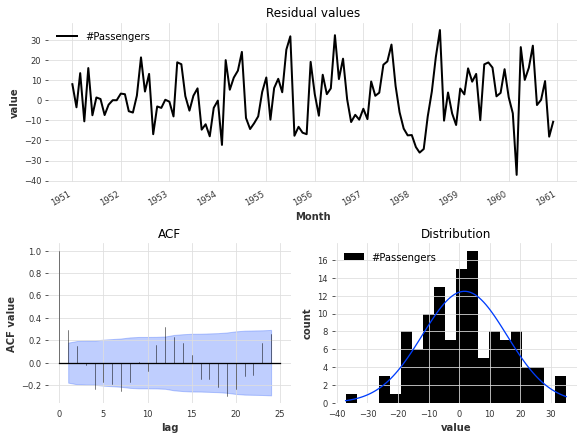

In [35]:
plot_residuals_analysis(model_es.residuals(series))

残差分析でも、残差の分布が値0を中心とするようになり、ACF値も重要ではないものの、大きさが小さくなるなど、性能が向上していることがわかる。

# **機械学習とグローバルモデル¶。**
Dartsは、機械学習やディープラーニングによる予測モデルを豊富にサポートしています。

- **RegressionModel**
は、sklearn と互換性のある回帰モデルをラップして、予測を生成することができます（以下に独自のセクションがあります）。
- **RNNModel**は、DeepARと同様に使用できる柔軟なRNNの実装です。

- **NBEATSModel**は、N-BEATS モデルを実装する。

- **TFTModel**は TemporalFusionTransformerのモデルを実装しています。

- **TCNModel**は、時間畳み込みネットワークを実装しています。

...

他のモデルと同じ基本的なfit()/predict()インターフェイスをサポートするだけでなく、これらのモデルは複数の時系列での学習（メタ学習と呼ばれることもある）をサポートするため、グローバルモデルとも言えます。

これは、MLベースのモデルを予測に使用する際の重要なポイントです。MLモデル（特に深層学習モデル）は、多くの場合、大量のデータで学習する必要があり、それはしばしば、別々ではあるが関連する時系列が大量にあることを意味します。

**Dartsでは、複数のTimeSeriesを指定するには、SequenceofTimeSeries（例えば、TimeSeriesの単純なリスト）を使用するのが基本的な方法です。**

# **RegressionModel**

---
sklearn と互換性のある回帰モデルをラップして、予測を生成することができます

<font color= "red"> RegressionModelは、対象系列のラグ値に基づいて、将来の値を予測する



---


- 対象系列（過去のラグのみ）
- オプションの **past_covariates シリーズ** (過去のラグのみ)
- オプションの **future_covariates シリーズ**(過去と未来のラグを含む)

---

- 回帰モデルは教師あり方式で学習され、fit()とpredict()メソッドを持つ表形式データで動作する「scikit-learn ライク」な回帰モデルをラップすることができる。

- また、Dartsはscikit-learnの線形回帰をラップした回帰モデルである**LinearRegressionModel**と、**ランダムフォレスト回帰**を提供します。

- このモデルの裏側では、**回帰モデルで動作するように時系列データを表形式化しています。**

- この場合、ラグは列挙されなければなりません<BR>(厳密に**負の値は過去のラグを表し**、<BR>**0を含む正の値は将来のラグを表します**)。


# **RNNModel**
---
**DeepARと同様に使用できる柔軟なRNNの実装**
---
このクラスは、3種類のRNNを提供します。

- バニラRNN

- LSTM

- GRU


---
**RNNModelは、予測時に、これらの入力を用いて出力を計算するという意味で、完全なリカレントモデルである。**

---
- 前のターゲット値、最初の予測では最後の既知のターゲット値に設定され、他のすべての予測では前の予測に設定されます（自動回帰式）。

- 前の隠された状態。

- 時間tのターゲットを予測するための時間tの共変量（モデルが共変量で学習された場合）。


---

このモデルは未来の共変量をサポートし、これらの共変量が過去と未来に十分に広がっていることを必要とします（未来の共変量が過去と未来の両方で提供されなければならないので、いわゆる「デュアル共変量」モデルです）。

提供されたfuture_covariatesシリーズが適切なタイムスパンを持っていない場合、このモデルは文句を言います。




# **共変量　covariate**

---
https://www.jspt.or.jp/ebpt_glossary/covariate.html#:~:text=%E5%88%86%E6%95%A3%E5%88%86%E6%9E%90%E3%82%92%E8%A1%8C%E3%81%86%E3%81%A8%E3%81%8D,%E7%8B%AC%E7%AB%8B%E5%A4%89%E6%95%B0%EF%BC%89%E3%81%A8%E5%90%8C%E7%AD%89%E3%81%A7%E3%81%99%EF%BC%8E


**分散分析を行うときに解析に含めるデータのうち，連続量で量的に表される変数のことをいいます．**

結果と**“共”に変わる原因と思われる“変量”**というわけです．

回帰分析で呼ぶところの**説明変数（独立変数）**と同等です．

これに対して**，質的に表される変数は要因**と呼ばれます．

---
# **例**

たとえば，歩行速度に対するブルンストロームステージⅠ～Ⅵで分けた6群，性別で分けた2群，年齢の影響（差）を見るときに，ブルンストロームステージと性別は要因，年齢は共変量と呼びます．

# **共変量について理解する**
**共変量とは**

---
- **共変量は通常、分散分析（ANOVA）とDOEで使用されます。**

- **これらのモデルでは、共変量は任意の連続変数で、データ収集の際は基本的に制御されていません。**

- **共変量を含むことで、入力された変数をモデルに含めたり調整したりできるようになります**。

- **この変数は、実験において測定されてはいますが、ランダム化や制御はされていません。**

- **共変量を追加することでモデルの精度を大きく高めることができ、さらには最終的な分析結果にも大きな影響を与えます。**

- **また、モデル内の誤差が削減され、因子検定の検定力も上がります。**

- **一般的な共変量として、処理を適用する前の検査対象物の周辺温度、湿度、特性などがあります。**

---

たとえば、技師が4種類の鉄の梁に見られる腐食の度合いを分析するとします。

各梁を液体処理して腐食を早めることにしましたが、液体の温度を調整することはできません。

<font color= "red">**つまり、このモデルで考慮すべき共変量は温度ということになります。**


# **NBEATSModel**
---
https://github.com/ServiceNow/N-BEATS


**神経基盤拡張分析時系列予測（N-BEATS）**

- N-BEATSは、一変量時系列予測のためのニューラルネットワークベースモデルです。

- M4 という時系列データのコンペティションで**昨年の Winner の結果よりも 3% 精度が良い**らしいです。

---
# **先行研究とどこがすごい？**

---
- 1変量時系列予測の潮流が古典的時系列モデルとDLモデルとのEnsemblingだったところを，**適切なDeep learningモデルを提案して予測精度の有用性を示した点**

- また，Deep Learningモデルながらも，**季節性とTrend成分ごとに分解し解釈性を上げるモデルを提案した点**

---
# **技術や手法のキモはどこ？**

- ・ドメイン固有のモジュールなしで，どの1変量時系列予測に適用できる

---
# **どうやって有効だと検証した？**
- 金融データセットを用いて実験

---
# **議論はある？**
- **評価指標が一般的に用いられているものでない**ので面白い (季節性を考慮した予測批評とか)

- 結構、層が深いモデルなので**データ数が少ない場合は過学習の可能性が高い**
https://github.com/hkefka385/paper_reading/issues/41
---

# **Dartsの実装として？**

- 論文で紹介した**一変量版**に加えて、

- **我々の実装では**、モデルの入力を一次元系列に平坦化し、出力を適切な次元のテンソルに 整形することにより、**多変量系列（および共変量）をサポートしています。**

- さらに、（尤度 パラメータを指定することにより）**確率的な 予測を行うこともサポートしています。**

- **このモデルは、過去の共変量（予測時刻以前のinput_chunk_length点で既知）をサポートしています。**



---




# **TFTModel**
**TemporalFusionTransformerのモデル**
- **時間融合変換装置**
---
- TemporalFusionTransformer(時間融合変換装置)は、自然言語処理タスクを実行するために設計された、深層学習モデルの一種です。

- TemporalFusionTransformer(時間融合変換装置)は、時系列データを処理するために設計されており、文章や音声などの自然言語データを扱うことができます。

- TemporalFusionTransformer(時間融合変換装置)は、Transformer(変換器)というモデルを拡張したもので、**複数の文書を同時に処理することができるようになっています。**

- TemporalFusionTransformer(時間融合変換装置)を使用することで、**自然言語処理タスクをより高速かつ正確に実行することができるとされています。**

- 解釈可能な多地点時系列予測のための時間的融合変換器のための時間的融合変換器の実装。このネットワークは、**ベンチマーク（指標となる）においてAmazonのDeepARを36-69%上回ります。**
---
- **ゲーティングメカニズム(ゲート機構)**：モデルアーキテクチャ(モデル構築)の未使用コンポーネント(未使用部品 )をスキップする。

- **変数選択ネットワーク：**各タイムステップで関連する入力変数を選択する。

- **LSTM（長期短期記憶）**による過去と未来の入力の時間的処理

- **マルチヘッド・アテンション(多頭注目)：**長期的な時間 依存性を捉える

- **予測区間:** デフォルトでは、決定論的な値ではなく、分位点の予測を生成します。
---
#トレーニング¶。
TFTModelは**過去と未来の共変量を用いて学習することができる。エンコーダ部(符号器)とデコーダ部(復号器)からなる固定サイズの領域に対して逐次学習を行う。**

**エンコーダ(符号器):**input_chunk_length（入力領域長)で過去の入力を表示する。

- **過去目標：**必須

- **過去の共変量:** 選択的

**デコーダ(復号器):**出力領域長を持つ将来の既知の入力

**将来の共変量:** 必須 (何もない場合は、ここから TFTModelのオプション引数add_encoders(追加エンコーダ(追加符号器))またはadd_relative_index(追加相対インデックス)を考慮する)

各反復において、モデルはデコーダ部(復号器)の形状（output_chunk_length(出力領域の長さ), n_quantiles(n_分位)）の分位予測値を生成する。


---
- https://unit8co.github.io/darts/examples/13-TFT-examples.html
- https://pytorch-forecasting.readthedocs.io/en/stable/api/pytorch_forecasting.models.temporal_fusion_transformer.TemporalFusionTransformer.html

# **TCNModel**
- 時間畳み込みネットワークモデル Temporal Convolutional Network Model（TCN）
時間的畳み込み回路網モデル 
---
- これは、[1]からヒントを得て、予測に使用する拡張TCNを実装したものである。
https://arxiv.org/abs/1803.01271

---
- 1.このモデルは、**過去の共変量（予測時刻以前の入力領域長点で既知）**をサポートしています。

- 2.Temporal Convolutional Networks（TCN）は、時系列や自然言語などの**順次的なデータを処理することに特化した深層学習モデルの一種**である。

- 3.画像処理でよく使われる**畳み込み層を順次的なデータの処理に利用するという考え**に基づいています。

- 4.TCNでは、入力は**データ点の並び**であり、出力も**データ点の並び**である。

- 5.このモデルは、**入力順に畳み込みフィルタを適用**し、**各フィルタが新しい出力特徴地図を生成**する。

- 6.**出力された出力特徴量地図** は、**ネットワーク内の後続の層で結合処理**され、**最終的な出力**が生成される。


---


##### TCNの**主な利点の一つ**は、
- **拡張畳み込みによって入力データの長期的な依存関係を捉えることができること**である。

- この拡張畳み込みによって、**モデルは入力要素**をいくつか**スキップ**しながら**順序全体を処理**することができる。

- このため、TCNは**自然言語処理**のような、**ある単語の意味がその前後にある単語の文脈に依存するようなタスク**に適している。

- TCNは、**誤差逆伝播法**や**勾配降下法**などの標準的な深層学習技術を使って学習することができる。

- TCNは、**言語モデリング**、**機械翻訳**、**音声認識など**、さまざまなタスクに利用されている。


---
# TCNの概要
- https://recruit.gmo.jp/engineer/jisedai/blog/fx_price_prediction_using_temporal_convolutional_network/

- TCNが「Temporal Convolutional Networks」の略でAn Empirical Evaluation of Generic Convolutional and Recurrent Networks for Sequence Modeling(配列（順序）モデリングのための一般的な畳み込みネットワークとリカレントネットワーク（再帰性神経回路網 ）の経験的評価)で紹介されました。

- 畳み込みニューラルネットワーク(CNN)の構造にRNNの特徴を加えて時系列データを処理します。

- TCNの特徴には下記の２点があります。

- どんな長さの入力でも同じ長さの出力を作成できる。また出力は入力より短くても可能。

- 畳み込み(Convolutional)構造が原因で、情報が未来から過去に”漏れる”（leakage）ことがない

- 1を保証するため1次元完全畳み込みネットワーク（FCN）構造(1D fully-convolutional network (FCN) architecture)を使います。

- これで、ネットワークの隠れ層も入力層と同じ長さとなります。

- また、 (kernel size − 1(フィルタサイズ１))ゼロパディングという手法を使って、次の順序を入力順序の長さと等しくします。 

- また、２を保証するため、時刻tの出力はそれ以前のデータのみを利用します。これは「causal convolutions（因果的畳み込み）」と言います。

- つまり、「TCN（時間畳み込みネットワークモデル） = 1D FCN（1次元完全畳み込みネットワーク（FCN）） + causal convolutions（因果的畳み込み）」で、挙動は下記の画像を見た方が分かりやすいですね。
---
# TCNの強い点
- **並列処理が可能**：これがRNN(再帰性神経モデル)と違うところです。

- TCNは**同じフィルタを各層に適用する**ため、**長い入力順序を同時に処理することができます**。

- トレーニングの際にRNN（LSTM、GRUなど）より**必要なメモリが少ない**。

- これは**各層に同じフィルタを共有**するためです。この特徴を持つことで**メモリにあまり余裕がなくてとも長い入力を処理可能**です。

- 時系列からパータンを学習する以外にも**各層でデータから特徴的なパターンを発見可能**。

# **TCN** (Temporal Convolutional Network) とは？


---

# **概要**

- 時系列データに対して汎用的かつシンプルで強力なCNN

- TCN : Temporal Convolutional Networkという名前の通り、系列データに対してCNNを用いたネットワークです。

- 時系列データのタスクに対して**LSTMやGRUを脳死で使うのではなくCNNを使うことも考えてみたら？**
というコンセプト

- TCNが自然言語や音楽などの時系列データに対するタスクで**LSTMなどのRNNよりも精度がよくなる**という結果が述べられています！

- 論文で試されたいくつかのタスクに対して、**そのアーキテクチャを変えることなく数々のタスクでより良い精度を示している**


---

# アーキテクチャ

- 実際のアーキテクチャ自体は完全に新しいものというわけではない

- 過去のCNNのいいところを、シンプルなアーキテクチャに蒸留するのが目的

-要するに**過去のCNNのいいところを集めて汎用的にしたモデル**
 
1. **dilated convolutional network(広げられた畳み込みネットワーク)**<br> - 畳み込む対象の要素が**上に行くにつれてまばら**になっていっている<br>-このようにdilated convolutional network(広げられた畳み込みネットワーク)は隣接した要素を畳み込むのではなく、**間をあけて畳み込んだCNNのこと**をいいます。<br>-実際にはi(i=0,1,2,3....)番目の層では**2のi乗個の要素ごとに畳み込まれている**のが見て取れます。<br>-こうすることで**LSTMのような長期的な視点を畳み込むことができる**ようになります。<br>-ちなみにdilatedとは**「広げられた」、「膨張された」**などを意味します。

2. **causal convolutonal network(因果的畳み込みネットワーク)**<br> -**畳み込む対象の要素が時系列的に今見ている要素以前のものであるCNN**<br> -普通CNNは**対象が1次元データなら見ている対象の左右両方を畳み込むが**<br> -今回扱っているのは時系列データなので**時間的に前のもののみを畳み込んでいる**<br> -これを**causal convolutonal network(因果的畳み込みネットワーク)**という<br> -

3. **residual convolutonal network(残留畳み込みネットワーク)**<br> -いわゆる、**スキップコネクション、残余ネットがあるCNN**<br> -これがあることで**勾配消失を防げる**<br> -ただ実際の学習はこの**スキップコネクションが多く適用されたパス**に対して主に行われて<br> -あまり**層を深く**しても意味がなく**勾配は関係ない**かもしれない

---



---
https://qiita.com/ooyamatakehisa/items/2a044b41c69f3c8802ef



# **Temporal Convolution Network (TCN)(時間畳み込みネットワーク)**
---
# **要点**
- 離散的な畳み込みと残差パスが特徴の時系列データ向けCNN

- 様々な時系列処理のタスクで、RNN系よりも高い性能を達成

- 時系列データだからRNNを利用するという考えを改めよと主張
---
# **はじめに**
- TCNはある特定のモデルの名称ではなく、**時系列データを処理するCNNの総称**として使われています
---
# **モデルのコンセプト**

- CNNの良いところを蒸留して、時系列処理のモデルを検討

- シンプルかつパワフルなモデルの提案を目指しています

- TCNでは、長期に渡る時系列の関係性を学習できるように、**「離散的な畳み込み」＋「深層化」をネットワーク構造の設計に反映**しています。

- 離散的な畳み込みはdilation(拡張) > 1とした畳み込みを指しています。

- 単にdilation(拡張)が大きい畳み込み層を1層用いるだけでは、そこまで効力がなさそうに見えますが、

- 層が深くなるにつれてdilation(拡張)を大きくすることで、**より広範囲の時系列データを反映できる**ようになります。

- より広い範囲の時系列データを出力に反映させようとした場合には、**層数をある程度大きくする必要**があります。

- そこで、近年の深層なモデルでは一般的に使われるようになった**残差パスを導入**しています。

---
# **ネットワーク構造**
- TCNでは**残差ブロック (Residual block) を繰り返す構造**となっています。

- 適用するタスク毎に**モデルの層数 (残差ブロックの数) を変えています。**

---
# **メリット・デメリット**

### **TCNのメリット**
- **並列化：**RNN系は時系列毎に逐次的に計算処理をする必要がありますが、**畳み込み層は全時間に渡って並列的な計算が可能**です。<br><br>

- **受容野の柔軟性：** TCNは**受容野 (出力に反映される入力時系列データの範囲) のサイズの調整が容易**です。<br> - **離散的な畳み込み層の層数を増やす**<br> - **dilation(拡張)やカーネルサイズを大きくする**などの調整方法が考えられます。<br> -  これにより、**適用するタスクの必要な受容野に合わせて、モデルのサイズを調整すること**ができます。<br><br>

- **安定した勾配計算：** RNNと異なり、TCNは時系列方向に対して複数の誤差逆伝播の経路を有しています。<br> **- そのため、RNN系で問題となる**勾配消失・勾配爆発の問題を回避**できます。

- **学習時の必要メモリの少なさ：**非常に長い時系列データが入力となる場合、LSTMなどではゲートセルなどの出力値も保存しておかなければならず、**学習時に多くのメモリが必要**となります。<br> 一方で、TCNでは**各層で同じフィルタを用いている**ため、**誤差逆伝播経路は層数の数に依存**します。<br> 例外となる場合もあるでしょうが、**「ゲート付きRNNの学習時に必要なメモリ数」>「TCNの学習時に必要なメモリ数」**となるようです。

- **時系列データの可変性：**RNN系と同様にTCNも**任意の時系列データを入力として受け取る**ことができるのに加えて、畳み込み層におけるストライドなどのハイパーパラメータを調整することで**出力の時系列長を任意に変更**ができます

### **TCNのデメリット**。
- **テスト時に必要なメモリ量の多さ：**テスト時にRNN系では**過去の状態量を保持する必要がありません**が、TCNでは離散的な畳み込みを行うため、**RNN系よりも多くのメモリが必要**となります。


- **転移学習が有効ではない可能性：**対象とするタスクによって、**モデルが学習すべき時系列長が異なる場合がある**ため、そのような場合には**転移学習は利用できず**、カーネルサイズやdilation(拡張)を変えるなどの**モデル構造の変更が必要**となる場合があります。

---
# **結果・考察**
- ほぼ全てのタスクで**TCNがRNN系よりも高い性能を達成**しており、**TCNの有効性**が確認できます。

- 以下は時間に応じた予測精度です。
- TCNでは**時間に依らず高い精度**となっていますが、RNN系は時間が**大きくなるにつれて予測精度が劣化**しています。

- この結果から、RNN系は理論的に全時系列データをカバーしていますが、**実際にはTCNの方がより長期に渡って時系列の関係性を内部に記憶できる**と主張しています。

- 同じモデルサイズという条件下で、**TCNがRNN系よりも優れるという有効性はある**かと思います。

---
# **まとめ**

- この論文の結論では、**CNNが時系列タスクに適用する際の最初のモデル候補**として考えられるべきだと主張されています。

- RNN系に不利な実験条件であった気もしますが、同じモデルサイズという条件で**TCNがRNN系よりも優れていそうだという結果**が得られています。

- また、**非常に長い時系列データの学習にRNN系が対応できない**ということも言われたりしているので、**モデルサイズをあまり大きくしたくなく、非常に長い時系列データを扱う場合にTCNは良い選択**になりそうです。

# **2つのシリーズを持つおもちゃの例¶。**
これらのモデルは、何千もの系列に対して学習させることができます。

ここでは、説明の ために2つの異なる系列（航空旅客数と、牛1頭あたりが毎月生産する牛乳のポンド数）を読み込みます。

また、系列を**np.float32にキャストする**ことで、**学習速度が若干速く**なります。

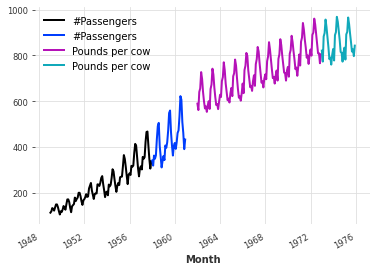

In [36]:
from darts.datasets import AirPassengersDataset, MonthlyMilkDataset

series_air = AirPassengersDataset().load().astype(np.float32)
series_milk = MonthlyMilkDataset().load().astype(np.float32)

#各シリーズの直近36ヶ月を検証用セットとして設定する。
train_air, val_air = series_air[:-36], series_air[-36:]
train_milk, val_milk = series_milk[:-36], series_milk[-36:]

train_air.plot()
val_air.plot()
train_milk.plot()
val_milk.plot()

まず、この2つの系列を**0と1の間でスケーリング**しましょう。

これは、**ほとんどのMLモデルに有効**です。

これにはスケーラーを使用します。

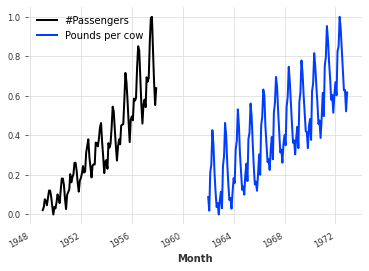

In [37]:
from darts.dataprocessing.transformers import Scaler

scaler = Scaler()
train_air_scaled, train_milk_scaled = scaler.fit_transform([train_air, train_milk])

train_air_scaled.plot()
train_milk_scaled.plot()

**一度に複数のシリーズをスケールすることができる**ことに注意してください。

**n_jobsを指定**することで、このような処理を**複数のプロセッサで並列化することも可能**です。

# **ディープラーニングの活用：N-BEATSを用いた例¶。**
次に、**N-BEATSモデル**を構築する。

このモデルは、**多くのハイパーパラメータ（スタック数、レイヤー数など）**で調整することが可能です。

ここでは、簡単のために、デフォルトのハイパーパラメータで使用します。

用意しなければならないハイパーパラメータは次の2つだけです。

**input_chunk_length(入力領域長)**: これはモデルの「**ルックバック・ウィンドウ(後方窓)**」、つまり、ニューラルネットワークがフォワードパス(前方通過)で出力を生成するために**入力として取る履歴の時間ステップ数**である。

**output_chunk_length(出力領域長):** これはモデルの**「フォワードウィンドウ(前方窓)」**、つまり、ニューラルネットワークがフォワードパス(前方通過)で**出力する未来の値の時間ステップ数**です。

**random_state(ランダム状態) パラメータ**は、**再現性のある結果を得るため**にここにあるだけです。

Darts のほとんどのニューラルネットはこの 2 つのパラメータ(引数 )を必要とします。ここでは、季節性の倍数を使用します。これで2つの系列にモデルを当てはめる準備ができました（2つの系列を含むリストをfit()に与えることで）。

In [38]:
from darts.models import NBEATSModel

model = NBEATSModel(input_chunk_length=24, output_chunk_length=12, random_state=42)

model.fit([train_air_scaled, train_milk_scaled], epochs=50, verbose=True);

/usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.callbacks.model_summary:
  | Name          | Type             | Params
---------------------------------------------------
0 | criterion     | MSELoss          | 0     
1 | train_metrics | MetricCollection | 0     
2 | val_metrics   | MetricCollection | 0     
3 | stacks        | ModuleList       | 6.2 M 
---------------------------------------------------
6.2 M     Trainable params
1.4 K     Non-trainable params
6.2 M     Total params
24.787    Total estimated model params size (MB)


Training: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=50` reached.


それでは、2つの系列について、**36ヶ月先の予測**をしてみましょう。

どの系列を予測するかは、**fit()関数のseries引数**を用いてモデルに指示すればよいのです。

重要なことは、**output_chunk_length(出力領域長)**は predict(予言)で使用できる**予測水平線nを直接制約しないこと**です。

ここでは、**output_chunk_length(出力領域長)=12**でモデルを学習させ、**n=36ヶ月先の予測を生成**します。

これは、単に舞台裏で**自動回帰的**に行われます（**ネットワークがその前の出力を再帰的に消費する**）。

Predicting: 7it [00:00, ?it/s]

Predicting: 7it [00:00, ?it/s]

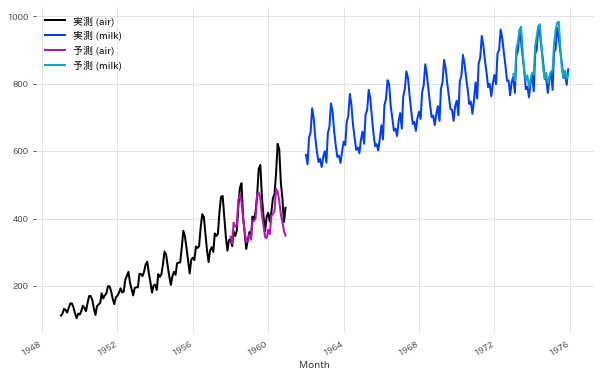

In [44]:
pred_air = model.predict(series=train_air_scaled, n=36)
pred_milk = model.predict(series=train_milk_scaled, n=36)

# 縮小::
pred_air, pred_milk = scaler.inverse_transform([pred_air, pred_milk])

plt.figure(figsize=(10, 6))
series_air.plot(label="実測 (air)")
series_milk.plot(label="実測 (milk)")
pred_air.plot(label="予測 (air)")
pred_milk.plot(label="予測 (milk)")

この予測は、航空旅客と生乳生産の両方を捉えるために、**デフォルトのハイパーパラメータを持つ1つのモデルを使用していること**を考えると、**実はそれほどひどいものではない**のです。

このモデルは、**年ごとの季節性を捉えるのにはかなり適している**と思われるが、**大気系列のトレンドは見逃している**。

次節では、**外部データ（共変量）**を用いてこの問題を解決してみる。

# **共変量：外部データの利用¶。**
**ターゲット系列（予測したい系列）**に加えて、Dartsの多くのモデルは**共変量系列**も入力として受け付けます。

共変量は予測したくない系列ですが、**モデルに有用な追加情報を提供**することができます。

**ターゲットと共変量は両方とも多変量または一変量にすることができます。**

Dartsには2種類の共変量時系列があります。

- **past_covariates(過去の共変量)**は 予測時刻の前に**必ずしも知られていない系列**です。
<br>
例えば、**測定されなければならず、前もって知られていないもの**past_covariates(過去の共変量)を表すことができます。
<br>
モデルは予測を行う際にpast_covariates**(過去の共変量)の将来の値を使用しません。**

- **future_covariates(将来の共変量)**は、予測地平まで**事前に分かっている系列**です。
<br>
これは**カレンダー情報、休日、天気予報など**を表すことができます。
<br>
future_covariates(将来の共変量)を受け入れるモデルは、**予測を行う際に将来の値（予測水平線まで）を見ることになります**。

<img src="https://unit8co.github.io/darts/_images/covariates-highlevel.png" alt="共変量">

**各共変量は多変量になる可能性**があります。

**複数の共変量系列（月や年の値など）**がある場合、それらを**stack(積み重ね)**または**concatenate(連結する)**して**多変量系列を取得する必要**があります。

**提供する共変量は必要以上に長くてもかまいません。**

ダーツは賢く、異なる系列の時間指標に基づいて、ターゲットを予測するために**適切な方法でそれら（共変量）をスライス**しようとします。

ただし、**共変量が十分な時間幅を持っていない**場合は、**エラーが発生**します。

それでは、空気とミルクの系列のために、**月と年の両方の値を含むいくつかの外部共変数を構築**しましょう。

下のセルでは、月と年の値を含む系列を生成するために**darts.utils.timeseries_generation.datetime_attribute_timeseries(ダーツ用ツール 時系列生成 時刻属性 時系列)関数**を使用し、**ターゲット系列ごとに2成分（月と年）の1共変量系列を得る**ために**"component(構成要素)"軸**に沿ってこれらの系列の**連結() **をしています。

簡単のために、**月と年の値を直接スケーリングして、（おおよそ）0と1の間になるようにしています。**

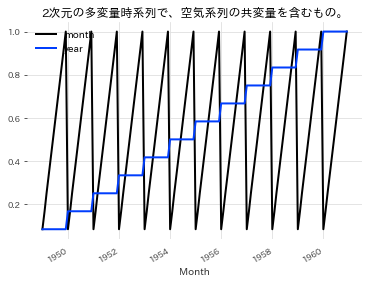

In [47]:
from darts import concatenate
from darts.utils.timeseries_generation import datetime_attribute_timeseries as dt_attr

air_covs = concatenate(
    [
        dt_attr(series_air.time_index, "month", dtype=np.float32) / 12,
        (dt_attr(series_air.time_index, "year", dtype=np.float32) - 1948) / 12,
    ],
    axis="component",
)

milk_covs = concatenate(
    [
        dt_attr(series_milk.time_index, "month", dtype=np.float32) / 12,
        (dt_attr(series_milk.time_index, "year", dtype=np.float32) - 1962) / 13,
    ],
    axis="component",
)

air_covs.plot()
plt.title(
    "2次元の多変量時系列で、空気系列の共変量を含むもの。"#空気系列の共変量を含む、2 次元の 1 つの多変量時系列:
);

すべてのモデルが**すべてのタイプの共変量**をサポートしているわけではありません。

**NBEATSModel(神経基盤拡張分析時系列予測)**では、past_covariates(過去の共変量) のみをサポートしています。

したがって、**共変量はカレンダー情報を表し、事前に分かっているにもかかわらず、N-BEATS ではpast_covariates(過去の共変量) として使用することになります。**

学習するためには、fit()関数にpast_covariates(過去の共変量)として、ターゲットと同じ順番で与えるだけです。

In [48]:
model = NBEATSModel(input_chunk_length=24, output_chunk_length=12, random_state=42)

model.fit(
    [train_air_scaled, train_milk_scaled],
    past_covariates=[air_covs, milk_covs],
    epochs=50,
    verbose=True,
);

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.callbacks.model_summary:
  | Name          | Type             | Params
---------------------------------------------------
0 | criterion     | MSELoss          | 0     
1 | train_metrics | MetricCollection | 0     
2 | val_metrics   | MetricCollection | 0     
3 | stacks        | ModuleList       | 6.6 M 
---------------------------------------------------
6.6 M     Trainable params
1.7 K     Non-trainable params
6.6 M     Total params
26.314    Total estimated model params size (MB)


Training: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=50` reached.


そして、予測を作成するために、再び**predict(予言する)関数にpast_covariates(過去の共変量)として共変量を提供する必要**があります。共変量の時系列には、**予測の地平線までの共変量の「将来」の値**も含まれているにもかかわらず、モデルはそれらの**将来の値を消費することはありません**。

Predicting: 7it [00:00, ?it/s]

Predicting: 7it [00:00, ?it/s]

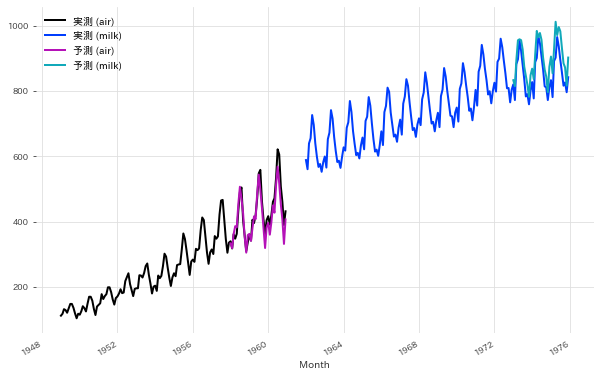

In [49]:
pred_air = model.predict(series=train_air_scaled, past_covariates=air_covs, n=36)
pred_milk = model.predict(series=train_milk_scaled, past_covariates=milk_covs, n=36)

# scale back:
pred_air, pred_milk = scaler.inverse_transform([pred_air, pred_milk])

plt.figure(figsize=(10, 6))
series_air.plot(label="実測 (air)")
series_milk.plot(label="実測 (milk)")
pred_air.plot(label="予測 (air)")
pred_milk.plot(label="予測 (milk)")

このモデルは、**大気系列のトレンドをよりよく捉えている**ようです（これは、牛乳系列の予測にも少し影響を及ぼしています）。

# **エンコーダー：フリー¶のための共変量の使用**
**カレンダーや時間軸に関連する共変量（上記の例のように月や年など）**を使うことは**非常に頻繁**にあるので、Dartsの深層学習モデルには、そのような**共変量(月や年などの時系列のもの)**をすぐに使える機能が組み込まれているのです。

このような共変量を簡単にモデルに統合するには、モデル作成時にadd_encoders (追加符号化器)パラメータを指定するだけです。

このパラメータは、**追加の共変量としてエンコード(符号化)されるべきものについての情報を含む辞書**でなければなりません。

以下は、**過去と未来の共変量をサポートするモデル**で、そのような辞書がどのようなものかを示す例です。

In [50]:
encoders = {
    "cyclic": {"future": ["month"]},
    "datetime_attribute": {"future": ["hour", "dayofweek"]},
    "position": {"past": ["absolute"], "future": ["relative"]},
    "custom": {"past": [lambda idx: (idx.year - 1950) / 50]},
    "transformer": Scaler(),
}

上記の辞書では、次のようなことが規定されています。

- **月は将来の共変量**として、**サイクリック（sin/cos）エンコーディング**で使用する。

- **時間帯と曜日は、今後共変量として使用する必要があります。**

- **過去の共変量として、絶対位置（シリーズの時間ステップ）を使用**する必要があります。

-** 予測時刻との相対的な位置関係を将来の共変数として使用**する必要があります。

- **過去の共変量として、年のカスタム関数を追加で使用**すること。

- 上記のすべての共変量は、**モデルfit()関数を呼び出したときにフィット**し、その後**共変数を変換するために使用されるScalerを使用してスケーリングする**必要があります。

エンコーダの使い方の詳細は、APIドキュメントを参照してください。

月と年を過去の共変量として用いた例をN-BEATSで再現するには、以下のようにいくつかのエンコーダーを使用することができる。

In [52]:
encoders = {"datetime_attribute": {"past": ["month", "year"]}, "transformer": Scaler()}

さて、これらの共変数を用いたN-BEATSモデルの学習全体は次のようになる。

In [53]:
model = NBEATSModel(
    input_chunk_length=24,
    output_chunk_length=12,
    add_encoders=encoders,
    random_state=42,
)

model.fit([train_air_scaled, train_milk_scaled], epochs=50, verbose=True);

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.callbacks.model_summary:
  | Name          | Type             | Params
---------------------------------------------------
0 | criterion     | MSELoss          | 0     
1 | train_metrics | MetricCollection | 0     
2 | val_metrics   | MetricCollection | 0     
3 | stacks        | ModuleList       | 6.6 M 
---------------------------------------------------
6.6 M     Trainable params
1.7 K     Non-trainable params
6.6 M     Total params
26.314    Total estimated model params size (MB)


Training: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=50` reached.


航空旅客シリーズの予想も出力。

Predicting: 7it [00:00, ?it/s]

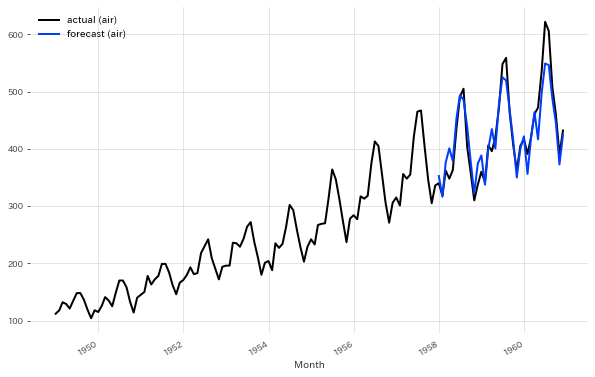

In [54]:
pred_air = model.predict(series=train_air_scaled, n=36)

# scale back:
pred_air = scaler.inverse_transform(pred_air)

plt.figure(figsize=(10, 6))
series_air.plot(label="actual (air)")
pred_air.plot(label="forecast (air)")